**An Introduction to Graph Theory and Network Analysis**
---

 `Graphs are mathematical structures used to study pairwise relationships between objects and entities. It is a branch of Discrete Mathematics and has found multiple applications in Computer Science, Chemistry, Linguistics, Operations Research, Sociology etc.`


A Graph is a pair of sets. `G = (V,E).` `V` is the set of vertices. `E `is a set of edges. `E` is made up of pairs of elements from `V` (unordered pair)

A DiGraph is also a pair of sets. `D = (V,A)`. `V` is the set of vertices. `A `is the set of arcs. A is made up of pairs of elements from `V` (ordered pair)
In the case of digraphs, there is a distinction between `(u,v)` and `(v,u)`. Usually the edges are called arcs in such cases to indicate a notion of direction.

![Graph](graph2.png)
![DiGraph](graph3.png)

## **Graph Theory concepts**
---

### **Average Path Length**
`The average of the shortest path lengths for all possible node pairs. Gives a measure of ‘tightness’ of the Graph and can be used to understand how quickly/easily something flows in this Network.`

### **BFS and DFS**
`Breadth first search and Depth first search are two different algorithms used to search for Nodes in a Graph. They are typically used to figure out if we can reach a Node from a given Node. This is also known as Graph Traversal`

`The aim of the BFS is to traverse the Graph as close as possible to the root Node, while the DFS algorithm aims to move as far as possible away from the root node.`

### **Centrality**
`One of the most widely used and important conceptual tools for analysing networks. Centrality aims to find the most important nodes in a network. There may be different notions of “important” and hence there are many centrality measures. Centrality measures themselves have a form of classification (or Types of centrality measures). There are measures that are characterized by flow along the edges and those that are characterized by Walk Structure.`

Some of the most commonly used ones are:

- `Degree Centrality` – `This is the number of edges connected to a node.` In the case of a directed graph, we can have 2 degree centrality measures. Inflow and Outflow Centrality
- `Closeness Centrality` – Of a node is the `average length of the shortest path from the node to all other nodes`
- `Betweenness Centrality` – `Number of times a node is present in the shortest path between 2 other nodes`
These centrality measures have variants and the definitions can be implemented using various algorithms. All in all, this means a large number of definitions and algorithms.

### **Network Density**
`A measure of how many edges a Graph has.` The actual definition will vary depending on type of Graph and the context in which the question is asked. For a complete undirected Graph the Density is 1, while it is 0 for an empty Graph. Graph Density can be greater than 1 in some situations (involving loops).

## **Graphs in python**
---

In [1]:
# import networkx
import networkx as nx

In [2]:
# create a graph
G = nx.Graph()

# add nodes
G.add_node(1)
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# add edges
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # unpack edge tuple*
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list


In addition to constructing graphs node-by-node or edge-by-edge, \
they can also be generated by applying classic graph operations, such as:

`subgraph(G, nbunch)`      - induced subgraph view of G on nodes in nbunch\
`union(G1,G2) `            - graph union\
`disjoint_union(G1,G2) `   - graph union assuming all nodes are different\
`cartesian_product(G1,G2)` - return Cartesian product graph\
`compose(G1,G2) `          - combine graphs identifying nodes common to both\
`complement(G)`            - graph complement\
`create_empty_copy(G)`     - return an empty copy of the same graph class\
`convert_to_undirected(G)` - return an undirected representation of G\
`convert_to_directed(G) `  - return a directed representation of G

**Accessing edges and nodes**\
Nodes and Edges can be accessed together using the `G.nodes()` and `G.edges()` methods. Individual nodes and edges can be accessed using the bracket/subscript notation.

In [3]:
# print nodes and edges
print(G.number_of_nodes())
print(G.number_of_edges())

3
3


In [4]:
# access nodes and edges
print(G.nodes())
print(G.edges())

[1, 2, 3]
[(1, 2), (1, 3), (2, 3)]


### Graph Visualization

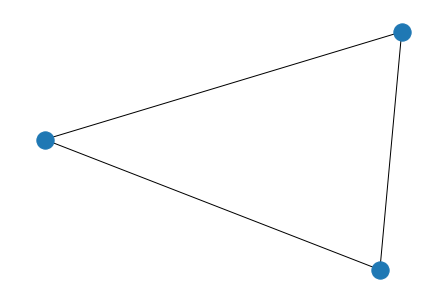

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

In [7]:
import pygraphviz as pgv

d={'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

strict graph "" {
	1 -- 2;
	2 -- 3;
	3 -- 1;
}



In [11]:
# Let us create another Graph where we can individually control the colour of each node
B = pgv.AGraph()

# Setting node attributes that are common for all nodes 
B.node_attr['style']='filled'
B.node_attr['shape']='circle'
B.node_attr['fixedsize']='true'
B.node_attr['fontcolor']='#FFFFFF'

# Creating and setting node attributes that vary for each node (using a for loop)
for i in range(16):
 B.add_edge(0,i)
 n=B.get_node(i)
 n.attr['fillcolor']="#%2x0000"%(i*16)
 n.attr['height']="%s"%(i/16.0+0.5)
 n.attr['width']="%s"%(i/16.0+0.5)
B.draw('star.png',prog="circo") # This creates a .png file in the local directory. Displayed below.

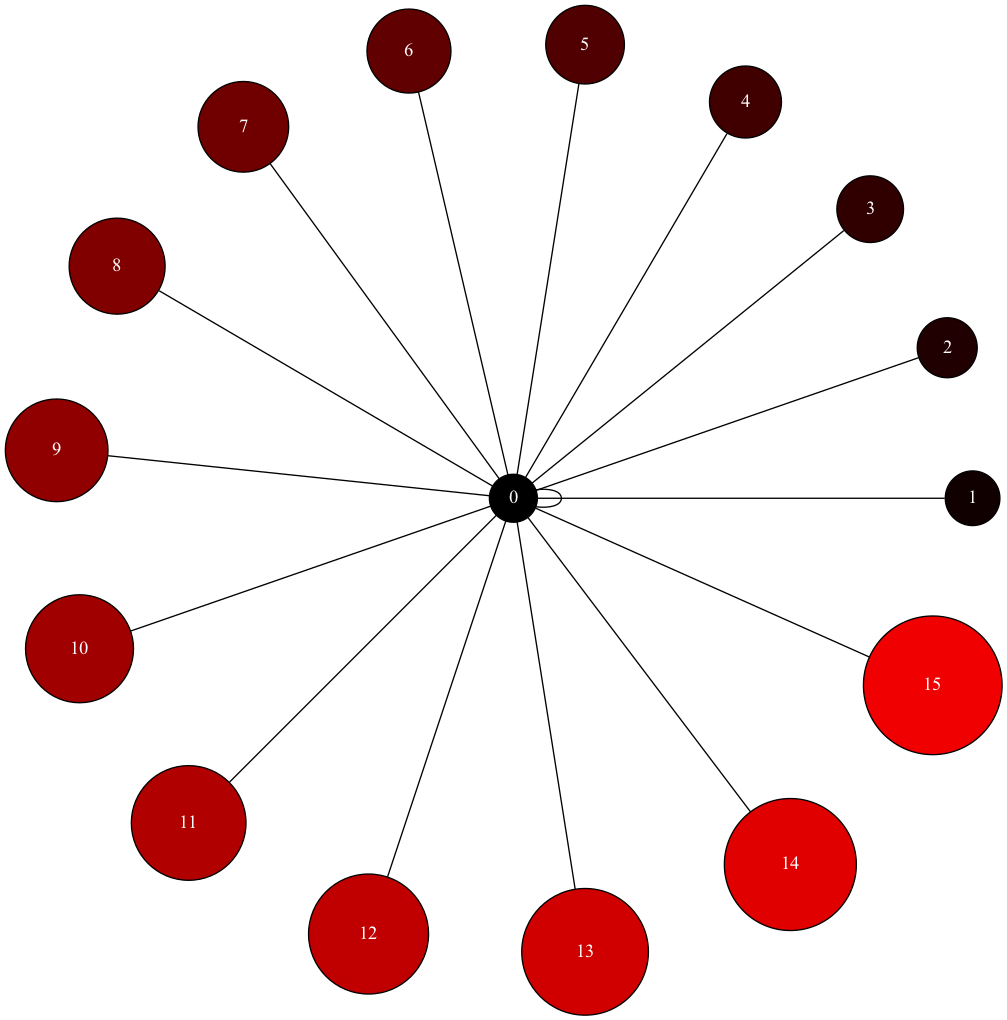

In [14]:
# Display the image inline
from IPython.display import Image
Image('star.png', width=650) # The Graph visualization we created above.

## Analysis on a Dataset
---

In [16]:
import pandas as pd 
import numpy as np

path = 'Airlines.csv'

data = pd.read_csv(path)
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422


- `We notice that origin and destination look like good choices for Nodes.` Everything can then be imagined as either node or edge attributes. A single edge can be thought of as a journey. And such a journey will have various times, a flight number, an airplane tail number etc associated with it

- `We notice that the year, month, day and time information is spread over many columns. We want to create one datetime column containing all of this information.` We also need to keep scheduled and actual time of arrival and departure separate. So we should finally have 4 datetime columns (Scheduled and actual times of arrival and departure)

- `Additionally, the time columns are not in a proper format.` 4:30 pm is represented as 1630 instead of 16:30. There is no delimiter to split that column. One approach is to use pandas string methods and regular expressions

- `We should also note that sched_dep_time and sched_arr_time are int64 dtype and dep_time and arr_time are float64 dtype`

- `An additional complication is NaN values`

In [17]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'


/var/folders/7f/4z7lvktj44g121hm_1s6v18h0000gn/T/ipykernel_42947/3363568261.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
/var/folders/7f/4z7lvktj44g121hm_1s6v18h0000gn/T/ipykernel_42947/3363568261.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
/var/folders/7f/4z7lvktj44g121hm_1s6v18h0000gn/T/ipykernel_42947/3363568261.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).as

In [18]:
# Finally we may want to combine the year, month and day columns into a date column.

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

`Now import the dataset using the networkx function that ingests a pandas dataframe directly. Just like Graph creation there are multiple ways Data can be ingested into a Graph from multiple formats.`

In [19]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)
FG.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [20]:
FG.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

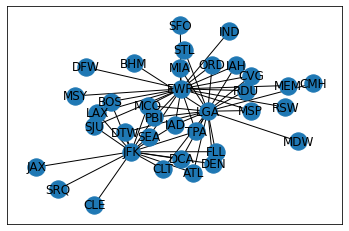

In [22]:
nx.draw_networkx(FG, with_labels=True) # Quick view of the Graph. As expected we see 3 very busy airports JFK, LGA and EWR

In [23]:
# Degree Centrality

nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
nx.density(FG) # Average edge density of the Graphs

0.09047619047619047

In [24]:
# Average shortest path length

nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [25]:
# Average degree connectivity

nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

`As is obvious from looking at the Graph visualization (way above) – There are multiple paths from some airports to others.` Let us say we want to calculate the shortest possible route between 2 such airports. Right off the bat we can think of a couple of ways of doing it

`There is the shortest path by distance`
`There is the shortest path by flight time`

**`Let us take the example of JAX and DFW airports:`**

In [26]:


# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
 print(path)
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [27]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

In [28]:
# Find the shortest path between two airports given Cost, Airtime and Availability

# Let us first create a function that will return the shortest path given a weight
def shortest_path_weighted(G, source, target, weight):
    path = nx.dijkstra_path(G, source=source, target=target, weight=weight)
    return path

# Let us now create a function that will return the shortest path given a weight and a constraint
def shortest_path_weighted_constraint(G, source, target, weight, constraint):
    path = nx.dijkstra_path(G, source=source, target=target, weight=weight)
    pathlength = nx.dijkstra_path_length(G, source=source, target=target, weight=weight)
    if pathlength <= constraint:
        return path
    else:
        return "No path available"
    

In [30]:
# test the function
shortest_path_weighted_constraint(FG, 'JAX', 'DFW', 'air_time', 50)


'No path available'

In [31]:
# shortest path between two airports given Cost, Airtime and Availability
def airport_shortest_path(cost, airtime, availability):
    if cost <= 100:
        return shortest_path_weighted_constraint(FG, 'JAX', 'DFW', 'cost', cost)
    elif airtime <= 50:
        return shortest_path_weighted_constraint(FG, 'JAX', 'DFW', 'air_time', airtime)
    elif availability >= 0.5:
        return shortest_path_weighted_constraint(FG, 'JAX', 'DFW', 'availability', availability)
    else:
        return "No path available"


In [33]:
airport_shortest_path(100s, 50, 0.8)

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']